Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


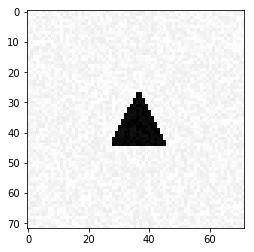

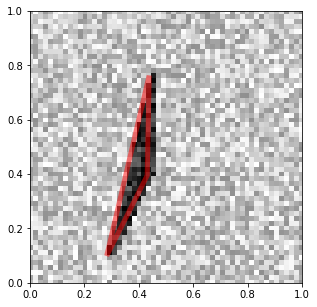

Epoch 1/8
300/300 [==============================] - 1s 2ms/step - loss: 0.9077 - acc: 0.1833
Epoch 2/8
300/300 [==============================] - 0s 587us/step - loss: 0.1327 - acc: 0.1867
Epoch 3/8
300/300 [==============================] - 0s 680us/step - loss: 0.1128 - acc: 0.1400
Epoch 4/8
300/300 [==============================] - 0s 560us/step - loss: 0.0923 - acc: 0.1733
Epoch 5/8
300/300 [==============================] - 0s 573us/step - loss: 0.0906 - acc: 0.1467
Epoch 6/8
300/300 [==============================] - 0s 547us/step - loss: 0.0852 - acc: 0.1600
Epoch 7/8
300/300 [==============================] - 0s 560us/step - loss: 0.0835 - acc: 0.1867
Epoch 8/8
300/300 [==============================] - 0s 573us/step - loss: 0.0836 - acc: 0.2100
accuracy
(array([[[ 1.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 1.,  0.,  0.]],

       [[ 1.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 1.,  0.,  0.

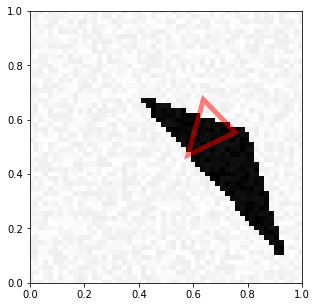

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(72,72), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(72,72), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(72,72), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.layers import Convolution2D, MaxPooling2D
from keras import optimizers
from keras.utils import plot_model

import keras 
from keras.wrappers.scikit_learn import KerasRegressor 
 
#Generating the training set 
[X_train, Y_train] =  generate_dataset_regression(300,200)
[X_test, Y_test] = generate_test_set_regression() 
 
#Visualizing the prediction 
visualize_prediction(X_train[0], Y_train[0] ) 
 
# Shape of the input 
shp = X_train.shape[1] 
 
#Normalization
Y_train_np = np.array(Y_train) 
Y_test_np = np.array(Y_test)

#Calculate the min and max
Y_train_min = np.min(Y_train_np) 
Y_train_max = np.max(Y_train_np) 
Y_test_min = np.min(Y_test_np) 
Y_test_max = np.max(Y_test_np) 

#Normalizing the numpy arrays of Y_train and Y_test 
Y_train = (Y_train_np - Y_train_min)/(Y_train_max -Y_train_min) 
Y_test = (Y_test_np - Y_test_min)/(Y_test_max -Y_test_min)     

#Modelling regression
def baseline_model():     
    model = Sequential()     
    model.add(Dense(100, activation = 'relu' , input_dim = shp,))     
    model.add(Dense(80, activation = 'relu'))     
    model.add(Dense(6))
    model.compile(loss = "mean_squared_error", optimizer = 'adam'  , metrics = ['accuracy'])     
    return model 
 
#Model fitting
reg = KerasRegressor(build_fn = baseline_model, epochs = 8, batch_size =32) 
reg.fit(X_train, Y_train, epochs = 8, batch_size = 32) 
 
#Predictions using the regressor 
pred = reg.predict(X_test) 
acscore = (Y_test, pred) 

 
#Visualise the prediction on the test data set 
visualize_prediction(X_test[5], pred[5]) 